In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install arviz

     |████████████████████████████████| 1.4MB 3.4MB/s 
     |████████████████████████████████| 4.1MB 49.3MB/s 
     |████████████████████████████████| 317kB 57.2MB/s 


In [0]:
%matplotlib inline
import arviz
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

Especifíquese la semilla para reproducibilidad

In [0]:
npr.seed(0)

In [0]:
q = 0.4
N = 100
yobs = np.random.binomial(N, q, 1)
print('y = ', yobs)

y =  [43]


Especifíquese el modelo Bayesiano:
- La distribución de $\Theta$, $p_\Theta(\theta) = U(\theta \mid 0, 1)$
- La distribución de $Y$ dado $\Theta$, $p_{Y \mid \Theta}(y \mid \theta) = \mathrm{Binomial}(y \mid \theta)$

In [0]:
model = pm.Model()
with model:
    q = pm.Uniform('q', lower=0, upper=1)
    y = pm.Binomial('y', N, q, observed=yobs)

Genérense las muestras de la distribución condicional $p_{\Theta \mid Y}(\theta \mid y)$

In [1]:
with model:
    trace = pm.sample(5000, random_seed=0)

NameError: ignored

(0, 1)

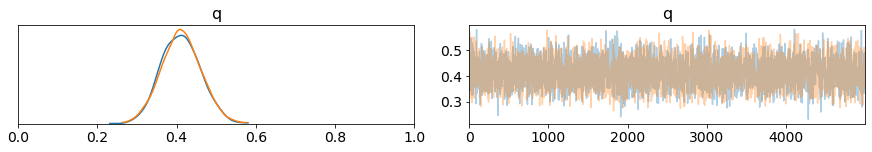

In [0]:
axes = pm.traceplot(trace);
axes[0][0].set_xlim(0, 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2182332fd0>],
      dtype=object)

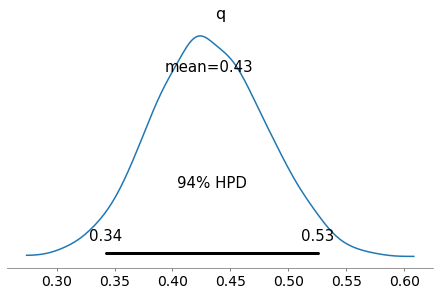

In [0]:
pm.plot_posterior(trace)